In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the CSV file into the DataFrame 
data = pd.read_csv('Downloads/diabetic_data.csv')

In [6]:
# Display some rows of the DataFrame 
print(data.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [7]:
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Print null value summations for each column
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# Handling missing values

# Completely drop the 'weight' column due to a high number of missing values
data.drop('weight', axis=1, inplace=True)

# Impute 'race' with the most frequent value
data['race'] = data['race'].fillna(data['race'].mode()[0])

# Impute 'payer_code' with 'Unknown'
data['payer_code'] = data['payer_code'].fillna('Unknown')

# Impute 'medical_specialty' with 'Unknown'
data['medical_specialty'] = data['medical_specialty'].fillna('Unknown')

# Impute 'diag_1', 'diag_2', 'diag_3' with 'Unknown'
data['diag_1'] = data['diag_1'].fillna('Unknown')
data['diag_2'] = data['diag_2'].fillna('Unknown')
data['diag_3'] = data['diag_3'].fillna('Unknown')

# Impute 'max_glu_serum' and 'A1Cresult' with 'None'
data['max_glu_serum'] = data['max_glu_serum'].fillna('None')
data['A1Cresult'] = data['A1Cresult'].fillna('None')

# Verify that there are no more missing values
print(data.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [10]:
print(data.head())

   encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code  ... citoglipton  insulin  glyburide-metformin  \
0                 1    Unknown  ...          No       No                   No   
1             

In [11]:
# Replace <30 or >30 days readmission to YES
data['readmitted'] = data['readmitted'].replace('>30', 'YES')
data['readmitted'] = data['readmitted'].replace('<30', 'YES')

# Drop duplicated rows to simplify the data
data.drop_duplicates(inplace=True)

# Check for duplicated rows dropped successfully 
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


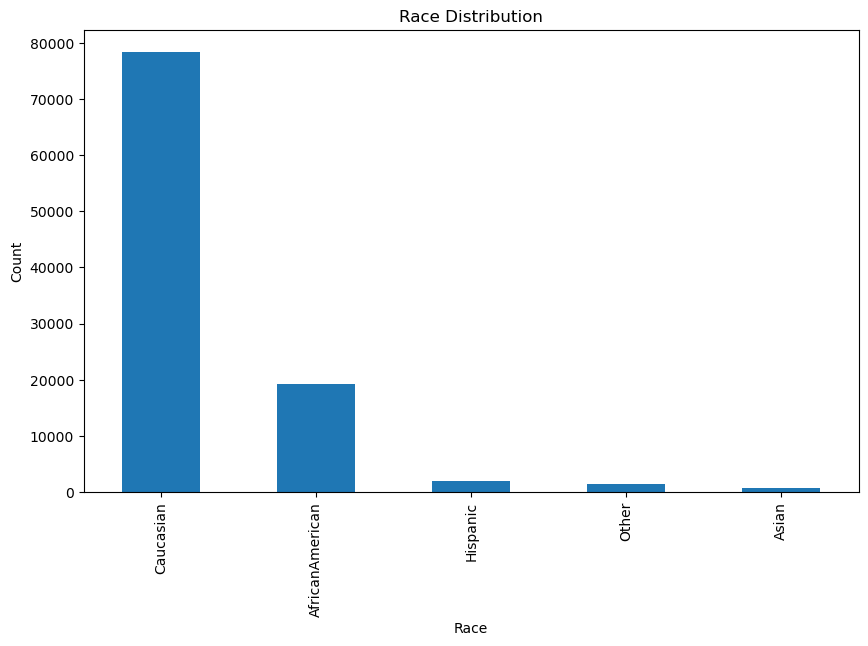

In [12]:
# Bar plot for Race distribution
plt.figure(figsize=(10, 6))
data['race'].value_counts().plot(kind='bar')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

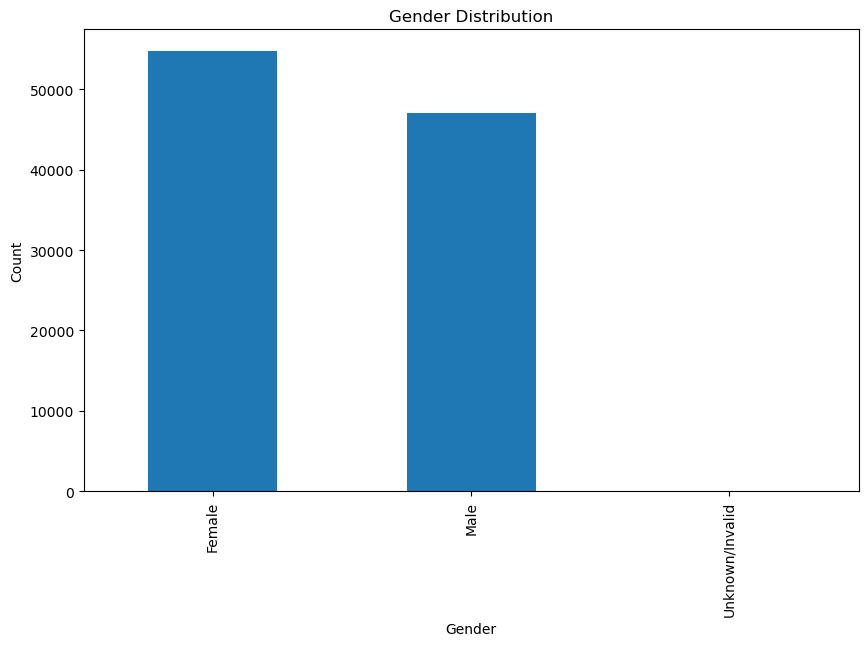

In [13]:
# Bar plot for Gender distribution
plt.figure(figsize=(10, 6))
data['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

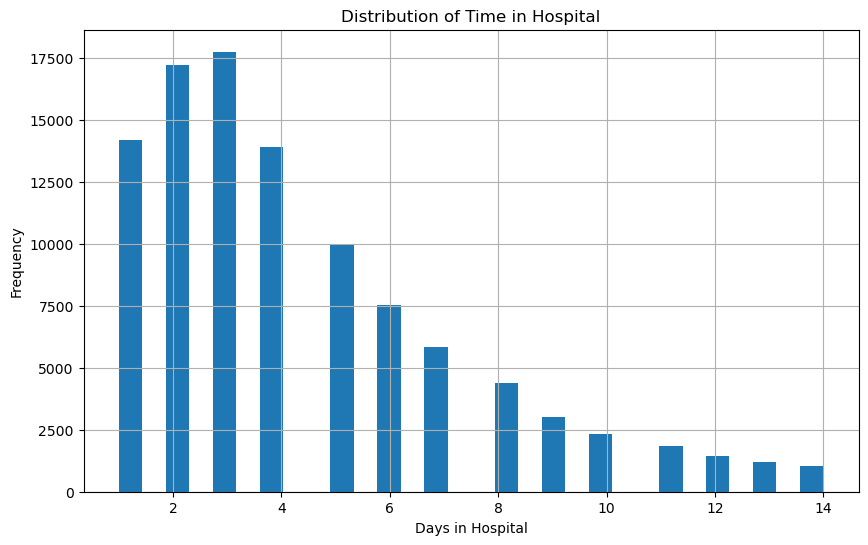

In [14]:
# Histogram for Time in Hospital
plt.figure(figsize=(10, 6))
data['time_in_hospital'].hist(bins=30)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')
plt.show()

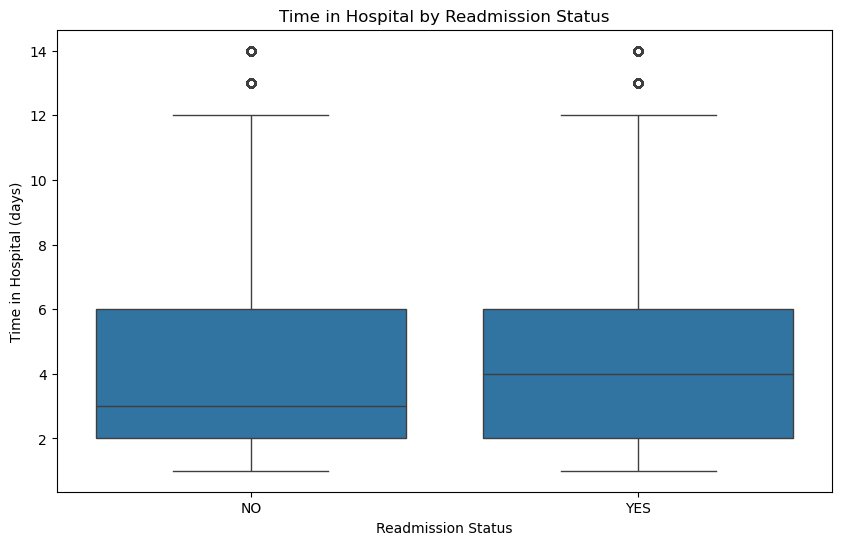

In [15]:
# Box plot for Time in Hospital by Readmission Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Time in Hospital (days)')
plt.show()

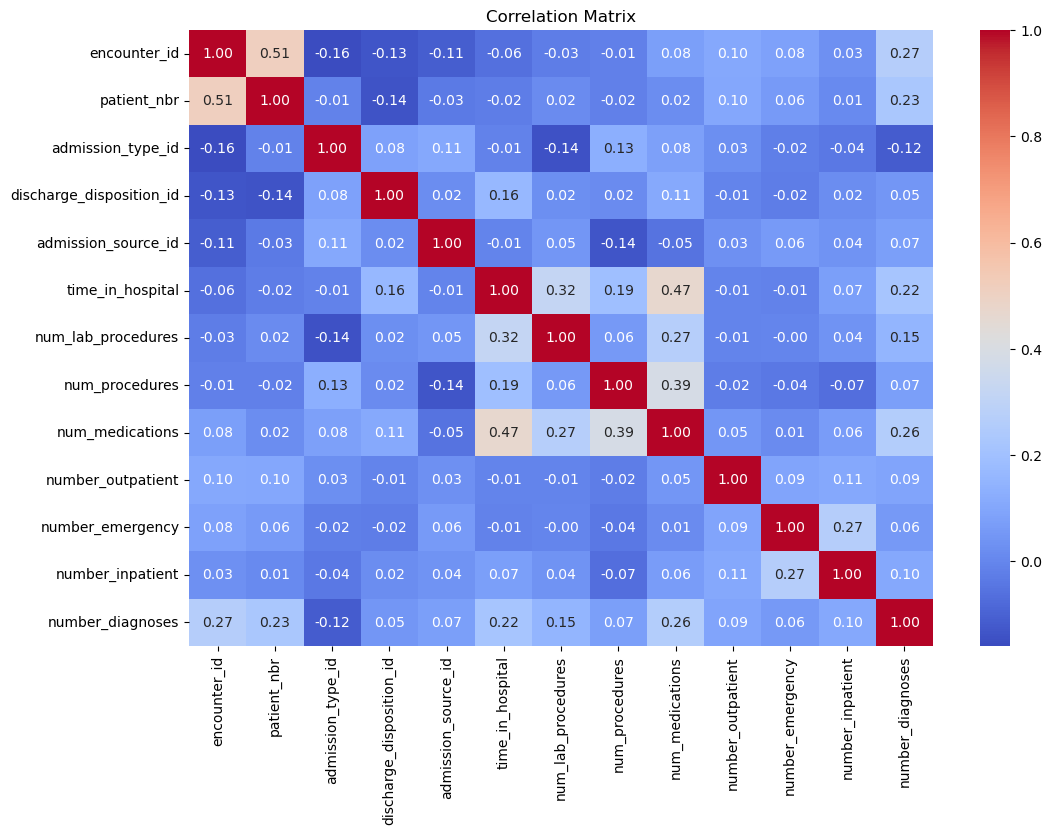

In [16]:
# Correlation Matrix of Un-normalised data

# Drop non-numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap creation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Handling the outliers 
# Find interquartile range
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Remove outliers
numeric_data_no_outliers = numeric_data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

# Normalize the data using Min-Max scaling

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numeric_data_no_outliers), columns=numeric_data_no_outliers.columns)

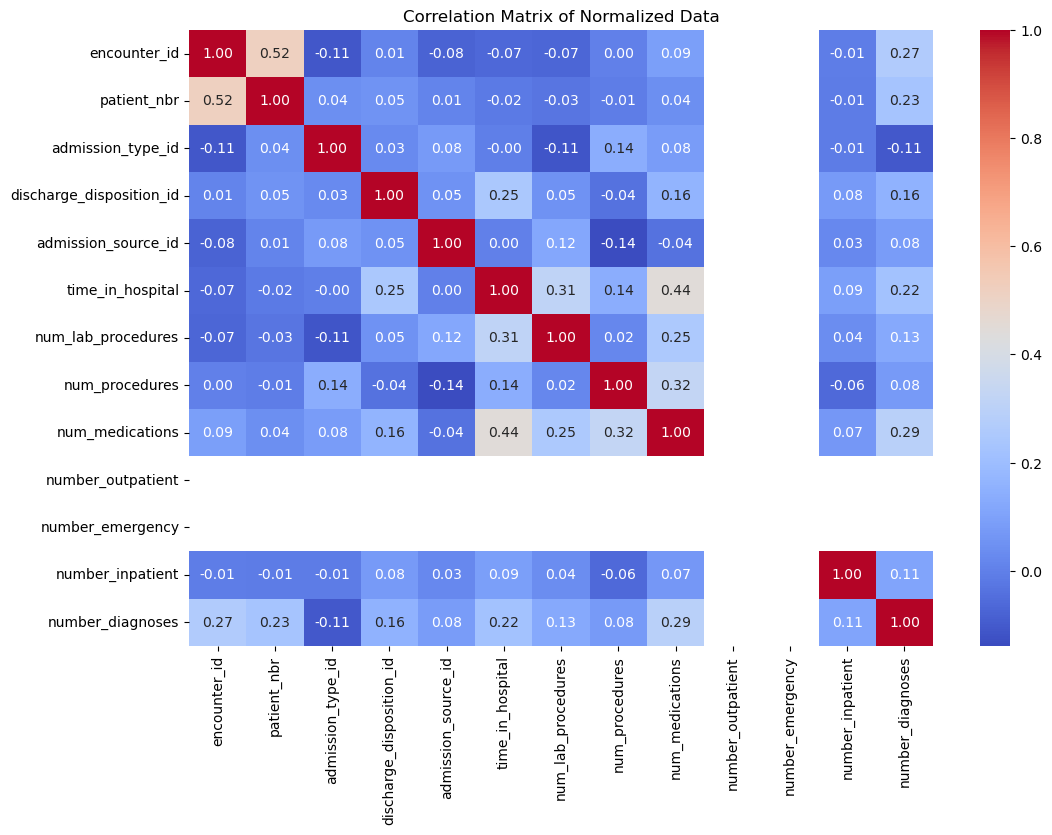

In [18]:
# Heatmap creation for normalised data
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Normalized Data')
plt.show()

In [19]:
# List of columns to replace (these should be the numeric columns you normalized)
columns_to_replace = normalized_data.columns.tolist()

# Replace the normalized columns in the original DataFrame
for column in columns_to_replace:
    if column in data.columns:
        data[column] = normalized_data[column]

# Remove NaN values in Final dataset 
data = data.dropna(axis=1)

In [20]:
# Prepare Features (X) and Target (y)
X = data.drop(columns=['readmitted'])
y = data['readmitted']   

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [21]:
# Divide data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002)
print(len(X_train), len(y_train))

101562 101562


In [22]:
# Create SVM Classifier
model = SVC()

In [ ]:
# Train the Model
print("Starting model training...")
model.fit(X_train, y_train)
print("Model training complete.")

Starting model training...
